In [17]:
import pandas as pd
reliance= pd.read_csv("INFY.csv")
print(reliance.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  1999-03-11  1.167969  1.562500  1.167969  1.464844   1.150338  86256000
1  1999-03-12  1.468750  1.523438  1.343750  1.457031   1.144202  19948800
2  1999-03-15  1.460938  1.460938  1.316406  1.324219   1.039905   6336000
3  1999-03-16  1.335938  1.382813  1.312500  1.312500   1.030702   4992000
4  1999-03-17  1.312500  1.398438  1.304688  1.320313   1.036838   7724800


In [18]:
print("trainging days =",reliance.shape)

trainging days = (4627, 7)


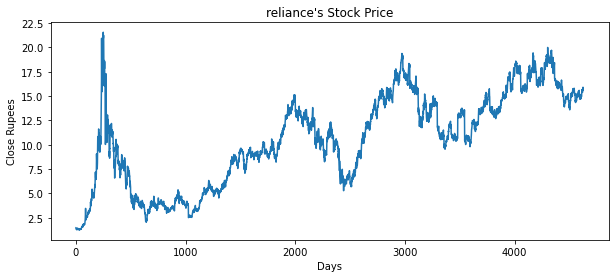

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.title("reliance's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Rupees")
plt.plot(reliance["Close"])
plt.show()

In [20]:
reliance = reliance[["Close"]]
print(reliance.head())

      Close
0  1.464844
1  1.457031
2  1.324219
3  1.312500
4  1.320313


In [21]:
futureDays = 25

In [22]:
reliance["Prediction"] = reliance[["Close"]].shift(-futureDays)
print(reliance.head())
print(reliance.tail())

      Close  Prediction
0  1.464844    1.359375
1  1.457031    1.312500
2  1.324219    1.257813
3  1.312500    1.250000
4  1.320313    1.351563
      Close  Prediction
4622  15.68         NaN
4623  15.81         NaN
4624  15.91         NaN
4625  15.59         NaN
4626  15.71         NaN


In [23]:
import numpy as np
x = np.array(reliance.drop(["Prediction"], 1))[:-futureDays]
print(x)
print(len(x))

[[ 1.464844]
 [ 1.457031]
 [ 1.324219]
 ...
 [14.9     ]
 [14.98    ]
 [14.77    ]]
4602


In [24]:
y = np.array(reliance["Prediction"])[:-futureDays]
print(y)
print(len(y))

[ 1.359375  1.3125    1.257813 ... 15.91     15.59     15.71    ]
4602


In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [26]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [27]:
xfuture = reliance.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[14.98]
 [15.16]
 [15.05]
 [15.06]
 [15.2 ]
 [15.51]
 [15.53]
 [15.4 ]
 [15.1 ]
 [15.3 ]
 [15.18]
 [15.23]
 [15.59]
 [15.33]
 [15.27]
 [14.95]
 [15.06]
 [15.14]
 [15.17]
 [15.07]
 [14.67]
 [14.82]
 [14.9 ]
 [14.98]
 [14.77]]


In [28]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [14.61333333 14.22875    14.71       15.235      14.89       15.13916667
 14.82       14.94       15.47750033 14.47875    15.32       15.32875
 15.29083333 15.56       15.11333333 15.64       15.235      15.385
 15.39       15.435      12.64875    15.57583333 14.3525     14.61333333
 14.965     ]


In [29]:
score = tree.score(xfuture, treePrediction)
print(score)

1.0


<ipython-input-30-36a09935511a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


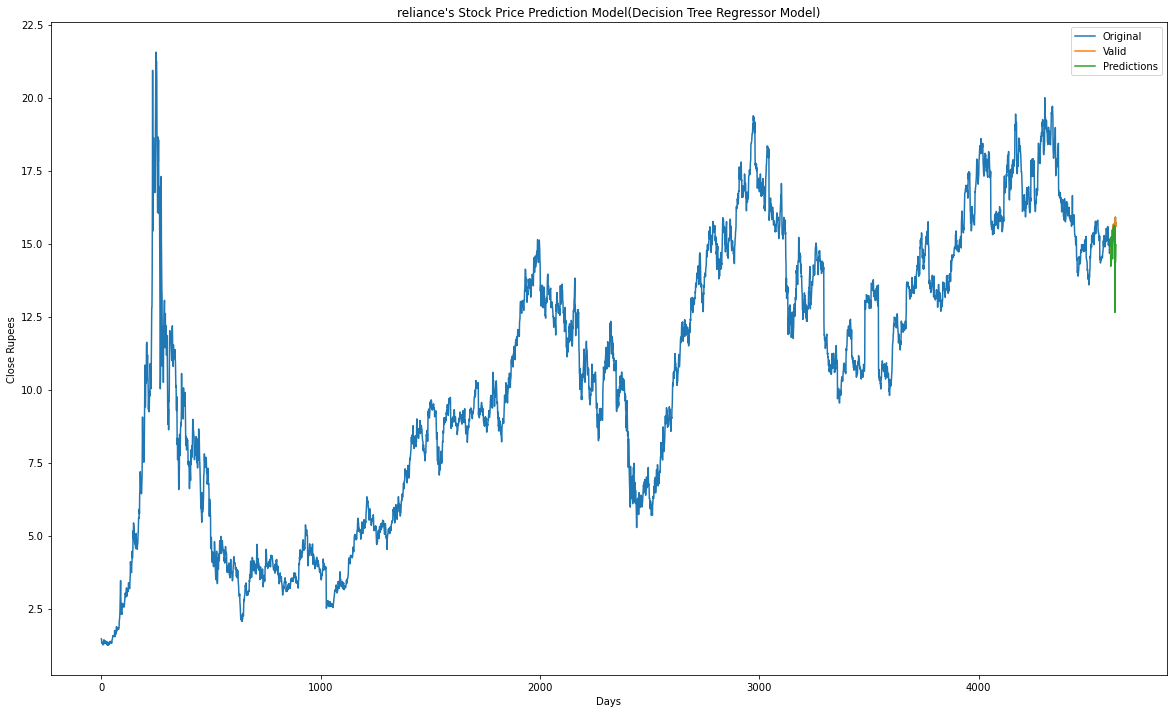

In [30]:
predictions = treePrediction
valid = reliance[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(20, 12))
plt.title("reliance's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Rupees")
plt.plot(reliance["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()